In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question 1 import the dataset

In [3]:
hosp = pd.read_csv('hospitalisations.csv')
hosp.head(5)

,State/UT,Private,Public
0,Andaman and Nicobar Islands,1.0,21.0
1,Andhra Pradesh,97863.0,34385.0
2,Arunachal Pradesh,5.0,630.0
3,Assam,14350.0,33553.0
4,Bihar,11747.0,34814.0


Question 2 how many rows and columns does the data set have ?

In [4]:
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State/UT  32 non-null     object 
 1   Private   30 non-null     float64
 2   Public    30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 900.0+ bytes


question 2 : Does the data set have missing values? If yes, how many?

In [5]:
hosp.isnull().sum()

State/UT    0
Private     2
Public      2
dtype: int64

Question 4: Drop the NA values

In [6]:
hosp.dropna(inplace=True)

In [7]:
hosp.isna().sum()

State/UT    0
Private     0
Public      0
dtype: int64

Question 5: create a new column total which contains a sum of private and public hospitalisations . so the column total should be a summation of the two columns
Public and private.

In [9]:
hosp['Total'] = hosp['Public'] + hosp['Private']

hosp.head(5)

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


Question 6: which state or UT is the unhealthiest?(i.e. maximum number of hospitalisation)
Hint: Do not include Grand total

In [10]:
hosp.sort_values(by='Total', ascending=False).head(5)

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0
6,Chhattisgarh,411814.0,142123.0,553937.0
16,Kerala,131557.0,391079.0,522636.0
10,Gujarat,379379.0,94845.0,474224.0
26,Tamil Nadu,120473.0,116701.0,237174.0


Question 7: Chattisagarh accounts for roughly 18% share in the total hopistalisations in india(assuming these are the only states/UTs in india). True or False?

In [11]:
hosp[hosp['State/UT'] == 'Chhattisgarh']

,State/UT,Private,Public,Total
6,Chhattisgarh,411814.0,142123.0,553937.0


In [12]:
hosp[hosp['State/UT'] == 'Grand Total']

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0


In [13]:
553937.0/2935313.0*100

18.87147980470907

Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [14]:
hosp[hosp['State/UT'] == 'Dadra and Nagar Haveli']

,State/UT,Private,Public,Total
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0


Question 9: Plot the total hospitalisations in a plot of your choice and comment on the healthiest state/UT.(Assuming that the only parameter for healthiest is the number of hospitalisations only)

C:\Users\muthy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


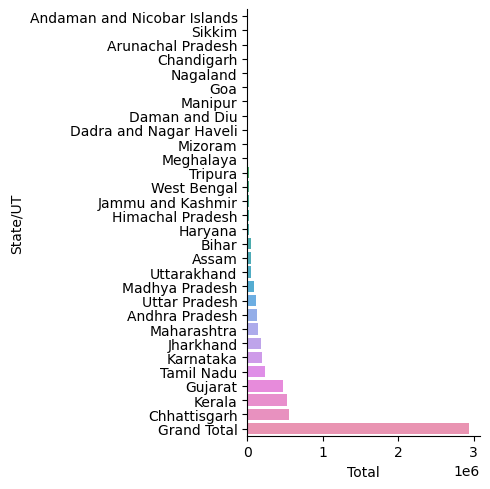

In [15]:
sns.catplot(x="Total", y="State/UT", kind="bar", data=hosp.sort_values(by='Total',ascending=True),height=5)

In [16]:
hosp_copy = hosp.iloc[:-1,:]
hosp_copy.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


In [17]:
finding_healthy = hosp_copy.groupby('State/UT')['Total'].sum().sort_values(ascending=False)
finding_healthy.index

Index(['Chhattisgarh', 'Kerala', 'Gujarat', 'Tamil Nadu', 'Karnataka',
       'Jharkhand', 'Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh',
       'Madhya Pradesh', 'Uttarakhand', 'Assam', 'Bihar', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'West Bengal', 'Tripura',
       'Meghalaya', 'Mizoram', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'Manipur', 'Goa', 'Nagaland', 'Chandigarh', 'Arunachal Pradesh',
       'Sikkim', 'Andaman and Nicobar Islands'],
      dtype='object', name='State/UT')

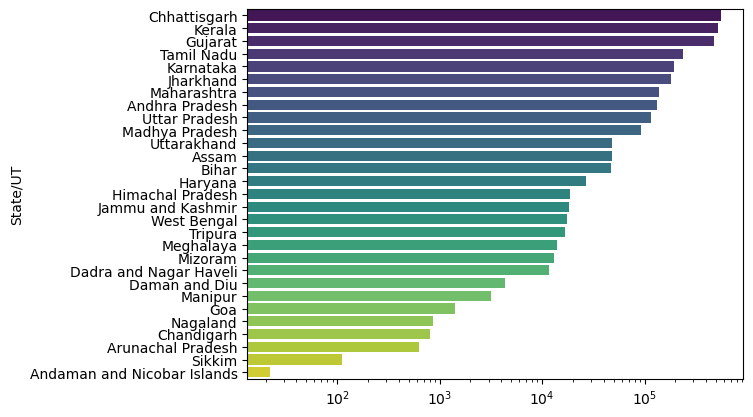

In [18]:
plt.Figure(figsize=(10,10))
sns.barplot(x=finding_healthy.values, y=finding_healthy.index, palette='viridis')
plt.xscale('log')

Question 10: Public hospitalisations are more on all indi level as compared to state/UT level. True or false?
Hint:Calculate the percentage of public hospitalisation(public/total),then find out the average percentage of all states using the mean()function. Compare this average percentage(state)with the grand total (all india)percentage and comment.

In [19]:
hosp['Public_Percent'] = hosp['Public']/hosp['Total']*100
hosp

,State/UT,Private,Public,Total,Public_Percent
0,Andaman and Nicobar Islands,1.0,21.0,22.0,95.454545
1,Andhra Pradesh,97863.0,34385.0,132248.0,26.000393
2,Arunachal Pradesh,5.0,630.0,635.0,99.212598
3,Assam,14350.0,33553.0,47903.0,70.043630
4,Bihar,11747.0,34814.0,46561.0,74.770731
5,Chandigarh,302.0,509.0,811.0,62.762022
6,Chhattisgarh,411814.0,142123.0,553937.0,25.656889
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,93.328783
8,Daman and Diu,984.0,3343.0,4327.0,77.259071
9,Goa,1033.0,382.0,1415.0,26.996466


In [21]:
hosp_copy['Public_Percent'] = hosp_copy['Public']/hosp_copy['Total']*100
hosp_copy

C:\Users\muthy\AppData\Local\Temp\ipykernel_18540\667091967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_copy['Public_Percent'] = hosp_copy['Public']/hosp_copy['Total']*100


,State/UT,Private,Public,Total,Public_Percent
0,Andaman and Nicobar Islands,1.0,21.0,22.0,95.454545
1,Andhra Pradesh,97863.0,34385.0,132248.0,26.000393
2,Arunachal Pradesh,5.0,630.0,635.0,99.212598
3,Assam,14350.0,33553.0,47903.0,70.043630
4,Bihar,11747.0,34814.0,46561.0,74.770731
5,Chandigarh,302.0,509.0,811.0,62.762022
6,Chhattisgarh,411814.0,142123.0,553937.0,25.656889
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,93.328783
8,Daman and Diu,984.0,3343.0,4327.0,77.259071
9,Goa,1033.0,382.0,1415.0,26.996466


In [22]:
hosp_copy['Public_Percent'].mean()

59.06385966573871

Question 11: Which states/UTs have more than 50000 hospitalisations?

In [23]:
hosp_copy[hosp_copy.Total>50000].sort_values(by='Total',ascending=False)['State/UT']

6       Chhattisgarh
16            Kerala
10           Gujarat
26        Tamil Nadu
15         Karnataka
14         Jharkhand
19       Maharashtra
1     Andhra Pradesh
28     Uttar Pradesh
18    Madhya Pradesh
Name: State/UT, dtype: object

Question 12: Which state reported exactly 1 case of private hospitalisation?

In [24]:
hosp_copy[hosp_copy['Private']==1]['State/UT']

0    Andaman and Nicobar Islands
Name: State/UT, dtype: object

Question 13: Which state/UT has maximum number of people admitted to public hospitals?

In [25]:
hosp_copy[hosp_copy['Public']==hosp_copy['Public'].max()]['State/UT']

16    Kerala
Name: State/UT, dtype: object

Question 14: Which state among Tripura and Gujarat Witnessed more hospitalisations?

In [26]:
hosp[hosp['State/UT']=='Tripura']

,State/UT,Private,Public,Total,Public_Percent
27,Tripura,90.0,16702.0,16792.0,99.46403


In [27]:
hosp[hosp['State/UT']=='Gujarat']

,State/UT,Private,Public,Total,Public_Percent
10,Gujarat,379379.0,94845.0,474224.0,20.000042


Question 15: Are there any extreme values/ outliers present in this data set? Do these values impact the analysis?

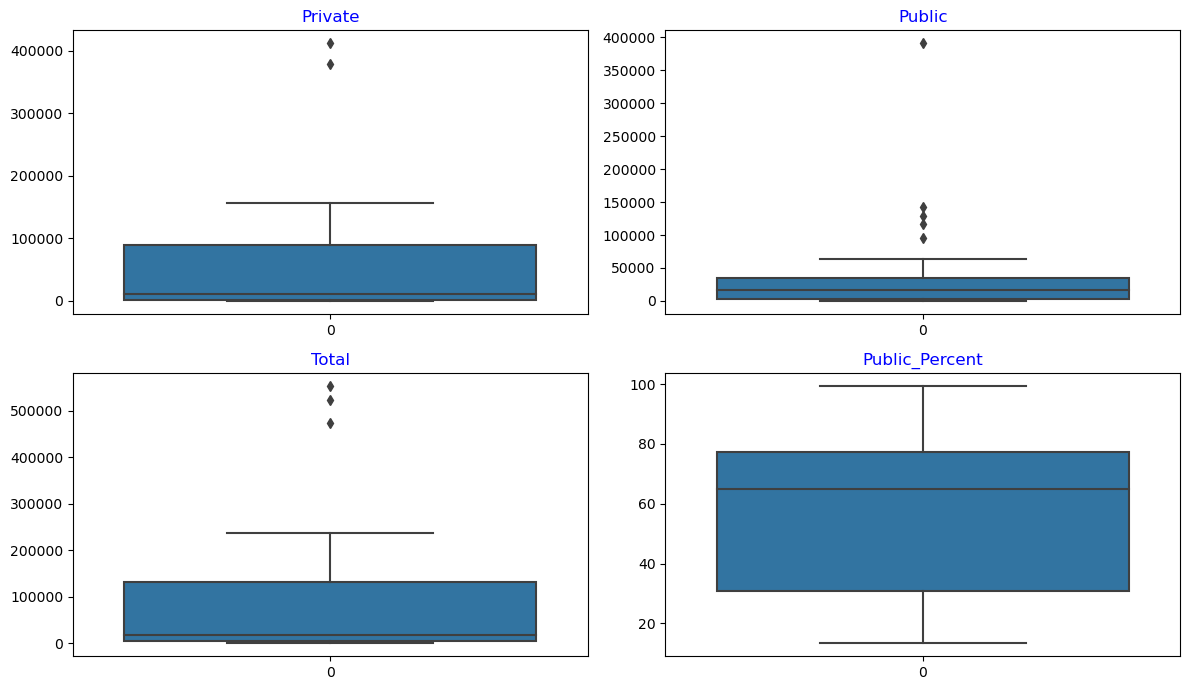

In [28]:
data_plot=hosp_copy[hosp_copy.dtypes[hosp_copy.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(2,2,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

In [29]:
hosp_copy.describe()

,Private,Public,Total,Public_Percent
count,29.000000,29.000000,29.000000,29.000000
mean,58521.275862,42696.413793,101217.689655,59.063860
std,104692.326879,78095.331456,158445.699356,27.642119
min,1.000000,21.000000,22.000000,13.331933
25%,725.000000,3343.000000,4327.000000,30.999093
50%,11747.000000,16461.000000,18621.000000,65.088074
75%,89987.000000,34385.000000,132248.000000,77.259071
max,411814.000000,391079.000000,553937.000000,99.464030
